In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Bike%20Prices.csv')
df.head()

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,TVS,TVS XL 100,30000,2017,Individual,1st owner,8000,30490.0
1,Bajaj,Bajaj ct 100,18000,2017,Individual,1st owner,35000,32000.0
2,Yo,Yo Style,20000,2011,Individual,1st owner,10000,37675.0
3,Bajaj,Bajaj Discover 100,25000,2010,Individual,1st owner,43000,42859.0
4,Bajaj,Bajaj Discover 100,24999,2012,Individual,2nd owner,35000,42859.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              1061 non-null   object 
 1   Model              1061 non-null   object 
 2   Selling_Price      1061 non-null   int64  
 3   Year               1061 non-null   int64  
 4   Seller_Type        1061 non-null   object 
 5   Owner              1061 non-null   object 
 6   KM_Driven          1061 non-null   int64  
 7   Ex_Showroom_Price  626 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 66.4+ KB


In [4]:
df=df.dropna()

In [5]:
df.describe()

,Selling_Price,Year,KM_Driven,Ex_Showroom_Price
count,626.000000,626.000000,626.000000,6.260000e+02
mean,59445.164537,2014.800319,32671.576677,8.795871e+04
std,59904.350888,3.018885,45479.661039,7.749659e+04
min,6000.000000,2001.000000,380.000000,3.049000e+04
25%,30000.000000,2013.000000,13031.250000,5.485200e+04
50%,45000.000000,2015.000000,25000.000000,7.275250e+04
75%,65000.000000,2017.000000,40000.000000,8.703150e+04
max,760000.000000,2020.000000,585659.000000,1.278000e+06


In [6]:
df[['Brand']].value_counts()

Brand   
Honda       170
Bajaj       143
Hero        108
Yamaha       94
Royal        40
TVS          23
Suzuki       18
KTM           6
Mahindra      6
Kawasaki      4
UM            3
Activa        3
Harley        2
Vespa         2
BMW           1
Hyosung       1
Benelli       1
Yo            1
dtype: int64

In [7]:
df[['Model']].value_counts()

Model                                     
Honda Activa [2000-2015]                      23
Honda CB Hornet 160R                          22
Bajaj Pulsar 180                              20
Yamaha FZ S V 2.0                             16
Bajaj Discover 125                            16
                                              ..
Royal Enfield Thunderbird 500                  1
Royal Enfield Continental GT [2013 - 2018]     1
Royal Enfield Classic Stealth Black            1
Royal Enfield Classic Squadron Blue            1
Yo Style                                       1
Length: 183, dtype: int64

In [8]:
df[['Seller_Type']].value_counts()

Seller_Type
Individual     623
Dealer           3
dtype: int64

In [9]:
df[['Owner']].value_counts()

Owner    
1st owner    556
2nd owner     66
3rd owner      3
4th owner      1
dtype: int64

In [10]:
df.columns

Index(['Brand', 'Model', 'Selling_Price', 'Year', 'Seller_Type', 'Owner',
       'KM_Driven', 'Ex_Showroom_Price'],
      dtype='object')

In [11]:
df.shape

(626, 8)

In [12]:
df.replace({'Seller_Type':{'Individual':0,'Dealer':1}},inplace=True)

In [13]:
df.replace({'Owner':{'1st owner':0,'2nd owner':1,'3rd owner':2,'4th owner':3}},inplace=True)
y=df['Selling_Price']

In [14]:
y.shape

(626,)

In [15]:
y

0       30000
1       18000
2       20000
3       25000
4       24999
        ...  
621    330000
622    300000
623    425000
624    760000
625    750000
Name: Selling_Price, Length: 626, dtype: int64

In [16]:
X=df[['Year','Seller_Type','Owner','KM_Driven','Ex_Showroom_Price']]
X.shape

(626, 5)

In [17]:
X

,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
0,2017,0,0,8000,30490.0
1,2017,0,0,35000,32000.0
2,2011,0,0,10000,37675.0
3,2010,0,0,43000,42859.0
4,2012,0,1,35000,42859.0
...,...,...,...,...,...
621,2014,0,3,6500,534000.0
622,2011,0,0,12000,589000.0
623,2017,0,1,13600,599000.0
624,2019,0,0,2800,752020.0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=112529)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((438, 5), (188, 5), (438,), (188,))

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred.shape

(188,)

In [21]:
y_pred

array([ 4.93184599e+04,  5.05339064e+04,  1.70389461e+04,  1.32606287e+05,
        6.10700612e+04,  4.56089160e+04,  1.44820195e+05,  8.09062217e+04,
        5.16293914e+04,  6.88427251e+04,  4.66793963e+04,  1.11633050e+05,
        2.34098219e+04,  3.06153166e+04,  3.95896459e+04,  5.29606445e+04,
        7.13286681e+04,  3.03507180e+04,  4.44151175e+04,  2.07863773e+04,
        5.25649038e+04,  4.87335384e+04,  3.02755633e+04,  1.06070635e+05,
        3.05469482e+04,  9.34085161e+04,  5.70301726e+04,  5.63476569e+04,
        6.01343768e+04,  1.27190407e+05,  4.29510441e+04,  1.07172447e+04,
        4.41905094e+04, -1.40096115e+04,  6.00843257e+04,  5.94491085e+04,
        9.40081040e+04,  2.54977227e+04,  1.27756004e+04,  3.70628483e+04,
        7.29055152e+03,  5.45482807e+04,  5.46274258e+04,  5.45858532e+04,
        1.09096449e+04,  7.50047197e+03,  1.16238222e+05,  8.61303362e+04,
        5.12350525e+04,  1.01497104e+05,  3.80481707e+04,  3.97014374e+04,
        4.04157945e+04,  

In [22]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mean_absolute_error(y_test,y_pred)

11232.3998266042

In [23]:
mean_squared_error(y_test,y_pred)

299439260.444038

In [24]:
r2_score(y_test,y_pred)

0.8361191478944047

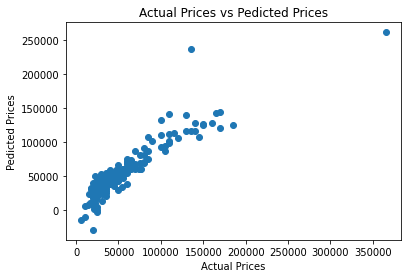

In [25]:
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Pedicted Prices")
plt.title("Actual Prices vs Pedicted Prices")
plt.show()

In [26]:
df_new=df.sample(1)
df_new

,Brand,Model,Selling_Price,Year,Seller_Type,Owner,KM_Driven,Ex_Showroom_Price
38,Hero,Hero Maestro,25000,2015,0,1,40000,49412.0


In [27]:
df_new.shape

(1, 8)

In [28]:
X_new = df_new.drop(['Brand','Model','Selling_Price'],axis=1)
y_pred_new=lr.predict(X_new)
y_pred_new

array([28642.88944181])